In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
from tqdm import tqdm
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
import numba as nb

# 3. Gravitational  N-body problem

In [2]:
def ri0():
    u=rand.random()
    costheta = 2*u-1
    theta = np.arccos(costheta)
    phi = 2*np.pi*rand.random()
    
    x=costheta
    y=np.sin(theta)*np.cos(phi)
    z=np.sin(theta)*np.sin(phi)
    return [x,y,z]

In [3]:
G = 4*np.pi**2
E = 0.1
m = 0.01
v0 = np.zeros(3)
h = 0.001
Pasos = int(2/h)
t = np.linspace(0,2,Pasos)

In [4]:
def GetA(Pparticulas):
    
    F = np.zeros((len(Pparticulas),3))
    for i in range(len(Pparticulas)):
        for j in range(len(Pparticulas)):
            if j != i:
                diferencia = Pparticulas[i] - Pparticulas[j]
                norma = np.linalg.norm(diferencia)
                for k in range(3):
                    F[i] += (Pparticulas[i]-Pparticulas[j])/((norma**2 + E**2)**(3/2))                  
    a = -G*m*F
    
    return a

In [5]:
def Verlet(particulas,v0,GetA,t):
    
    h = (t[-1] - t[0])/(len(t)-1)
    
    R = np.zeros((len(particulas),len(t),3))
    V = np.zeros((len(particulas),len(t),3))
        
    for i in range(len(particulas)):   
        R[i,0] = particulas[i]
        V[i,0] = v0
    
    for i in range(len(particulas)):
        R[i,1] = R[i,0] + V[i,0]*h 
        
    for i in tqdm(range(1,len(t)-1)):
        a = GetA(R[:,i])
        for j in (range(len(particulas))):
            for k in range(3):
                R[j,i+1,k] = 2*R[j,i,k] - R[j,i-1,k] + a[j,k]*h**2
                V[j,i] = (R[j,i+1]-R[j,i-1])/(2*h)
                
    for l in range(len(particulas)):
        V[l,-1] = V[l,-2]
                
    return R,V

In [6]:
def Ec(m,v):
    Ec = np.zeros(v.shape[1])
    for i in tqdm(range(v.shape[1])):     
        for j in range(v.shape[0]):
            Ec[i] += m*(np.linalg.norm(v[j,i]))**2
    Ec *= 1/2
    return Ec

In [7]:
def Ep(G,E,m,r):
    Ep = np.zeros(r.shape[1])
    for i in tqdm(range(r.shape[1])):     
        for j in range(r.shape[0]):
            for k in range(r.shape[0]):
                if k != j:
                    diferencia = r[j,i] - r[k,i]
                    norma = np.linalg.norm(diferencia)
                    Ep[i] += (m**2)/((norma**2 + E**2)**(1/2))                 

    Ep *= -G/2
    return Ep

In [8]:
def p(m,v):
    p = np.zeros((v.shape[1],3))
    for i in tqdm(range(v.shape[1])):
        for j in range(v.shape[2]):
            for k in range(v.shape[0]):
                p[i,j] += v[k,i,j]
    p *=m
    return p

In [9]:
def L(m,r,v):
    LL = np.zeros((r.shape[1],3))
    for i in tqdm(range(r.shape[1])):
        for j in range(r.shape[0]):
            LL[i] += np.cross(r[j,i],v[j,i])
    
    L = np.zeros(LL.shape[0])
    for j in range(LL.shape[0]):
        L[j] = np.linalg.norm(LL[j])
        
    L *= m
        
    return L

## Simulación

In [10]:
N = 100

In [11]:
particulas = np.zeros((100,3))
for i in tqdm(range(N)):
    particulas[i] = ri0()

100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 33439.40it/s]


In [ ]:
solucion = Verlet(particulas,v0,GetA,t)

 37%|█████████████████████████████▏                                                 | 737/1998 [04:19<07:21,  2.85it/s]

In [ ]:
r_,v_ = solucion

## Graficas 

In [ ]:
EnergiaC = Ec(m,v_)
EnergiaP = Ep(G,E,m,r_)
EnergiaT = EnergiaC + EnergiaP
Momentos = p(m,v_)
MomentoX = Momentos[:,0]
MomentoY = Momentos[:,1]
MomentoZ = Momentos[:,2]
MomentoA = L(m,r_,v_)

Text(0, 0.5, '$P_i$')

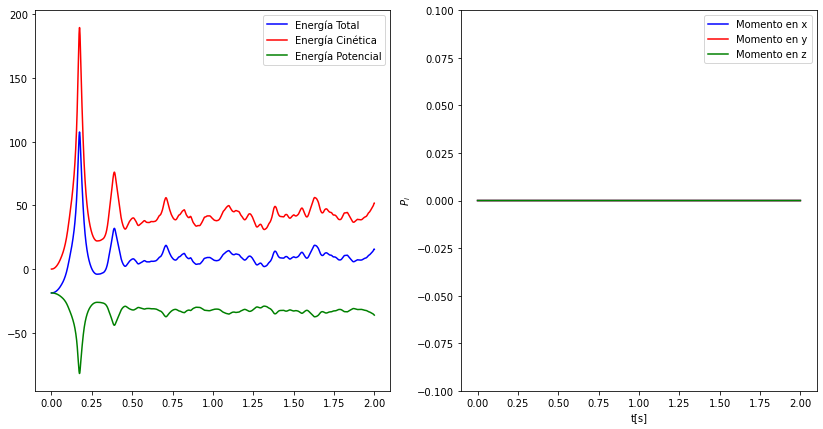

In [237]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax.plot(t,EnergiaT, label='Energía Total', color='b')
ax.plot(t,EnergiaC, label='Energía Cinética', color='r')
ax.plot(t,EnergiaP, label='Energía Potencial', color='g')
ax.legend()
plt.xlabel(f't[s]')
plt.ylabel(f'E')
ax1.plot(t,MomentoX, label='Momento en x', color='b')
ax1.plot(t,MomentoY, label='Momento en y', color='r')
ax1.plot(t,MomentoZ, label='Momento en z', color='g')
ax1.legend()
plt.ylim([-0.1,0.1])
plt.xlabel(f't[s]')
plt.ylabel(f'$P_i$')

Text(0, 0.5, '$|\x0bec<function L at 0x6ffff35c8cb0>$|')

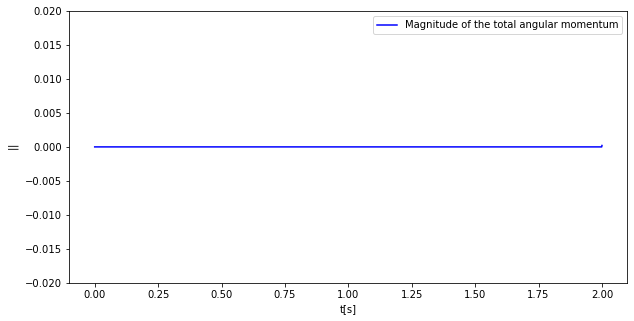

In [238]:
fig1 = plt.figure(figsize=(10,5))
ax11 = fig1.add_subplot(111)
ax11.plot(t,MomentoA, label='Magnitude of the total angular momentum', color='b')
ax11.legend()
plt.ylim([-0.02,0.02])
plt.xlabel(f't[s]')
plt.ylabel(f'$|\vec{L}$|')

## Animación

In [50]:
Limits = np.array([2.,2.,2.]) 

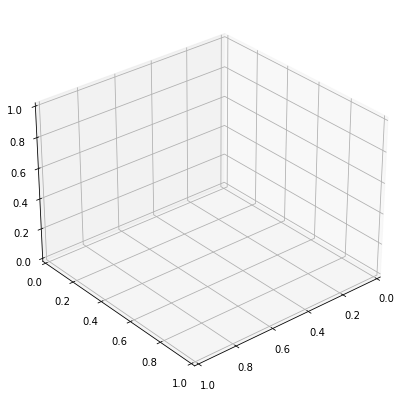

In [243]:
fig2 = plt.figure(figsize=(7,7))
ax2 = fig2.add_subplot(1,1,1, projection = '3d',elev = 30, azim = 50)
    
def init():
    ax2.set_xlabel(r'$x[m]$',fontsize=15)
    ax2.set_ylabel(r'$y[m]$',fontsize=15)
    ax2.set_zlabel(r'$z[m]$',fontsize=15)
    ax2.set_xlim(-2,2)
    ax2.set_ylim(-2,2)
    ax2.set_zlim(-2,2)

def Update(i):
    
    plot = ax2.clear()
    init()

    for r in r_:
                    
        x = r[i,0]
        y = r[i,1]
        z = r[i,2]
        
        plot = ax2.set_title(r'$t=%.2f \ years$' %(t[i]))
        plot = ax2.scatter(x,y,z,marker='.')


    plot = ax.legend()
            
    return plot
    
Animation = anim.FuncAnimation(fig2,Update,frames=len(t),init_func=init)

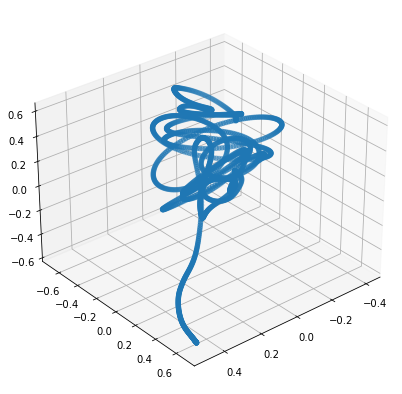

In [240]:
fig2 = plt.figure(figsize=(7,7))
ax2 = fig2.add_subplot(1,1,1, projection = '3d',elev = 30, azim = 50)
ax2.scatter(r_[2,:,0],r_[2,:,1],r_[2,:,2])